In [1]:
from fcn import FCN
from voc_data_reader import VOCDataReader
import tensorflow as tf
import numpy as np
import cv2
import os, sys
import matplotlib.pyplot as plt
import logging

logging.basicConfig(level = logging.DEBUG)
logging.debug('Init logging')
%matplotlib inline

DEBUG:root:Init logging


In [2]:
TRAINVAL_ROOT_DIR = '/home/paperspace/PASCAL-VOC-Dataset/TrainVal'
TEST_ROOT_DIR = '/home/paperspace/PASCAL-VOC-Dataset/Test'
VGG_PARAMS_ROOT_DIR = '/home/paperspace/FCN/vgg-weights'

fcn = FCN(TRAINVAL_ROOT_DIR, TEST_ROOT_DIR, VGG_PARAMS_ROOT_DIR)
dsr = VOCDataReader(TRAINVAL_ROOT_DIR, TEST_ROOT_DIR)

fcn.train(0, 1, 1, '/home/paperspace/FCN/best_params_coarse/fcn_4100.ckpt')

DEBUG:get_vgg_params:VGG Keys: dict_keys(['conv5_1', 'fc6', 'conv5_3', 'conv5_2', 'fc8', 'fc7', 'conv4_1', 'conv4_2', 'conv4_3', 'conv3_3', 'conv3_2', 'conv3_1', 'conv1_1', 'conv1_2', 'conv2_2', 'conv2_1'])


INFO:tensorflow:Restoring parameters from /home/paperspace/FCN/best_params_coarse/fcn_4100.ckpt


INFO:tensorflow:Restoring parameters from /home/paperspace/FCN/best_params_coarse/fcn_4100.ckpt
DEBUG:FCN:========= COARSE TRAINING =========
DEBUG:FCN:========= FINE TRAINING =========
DEBUG:VOCDataReader:Batch selected: ['2008_003180']
DEBUG:VOCDataReader:(375, 500)
DEBUG:FCN:Iteration #0 average train loss: 3.1870276927948
DEBUG:FCN:Found best fine params! Saving to best_params_fine/
DEBUG:FCN:Model params after 1 iterations saved to best_params_fine/fcn_1.ckpt


In [3]:
tb = dsr.next_train_batch(1)
images = tb['batch']
names = tb['names']
for i in images:
    img = i
# img = np.reshape(img, [1, img.shape[0], img.shape[1], img.shape[2]])
output_coarse = fcn.infer(img, '/home/paperspace/FCN/best_params_coarse/fcn_4100.ckpt')
output_fine = fcn.infer(img, '/home/paperspace/FCN/best_params_fine/fcn_1.ckpt')

def label_matrix_to_image(label_mat, image_file = None):
    def convert(label_mod):
        # logging.debug('trying to hash {}'.format(label))
        label = label_mod[0]
        return np.array(dsr.voc_color_map[label], dtype=np.float32)
    logging.debug('Label mat shape: {}'.format(label_mat.shape))
    label_mat[label_mat == 21] = 255
    np.set_printoptions(threshold=np.nan)
    # logging.debug('{}'.format(label_mat))
    label_mat = np.expand_dims(label_mat, axis=2)
    label_mat = np.concatenate([label_mat, np.zeros(label_mat.shape), np.zeros(label_mat.shape)], axis=2)
    img_mat = np.apply_along_axis(convert, 2, label_mat)
    logging.debug('Converted shape: {}'.format(img_mat.shape))
    if image_file is not None:
        plt.imsave(fname=image_file, arr=img_mat, format='png')
    return img_mat

DEBUG:VOCDataReader:Batch selected: ['2007_001149']


INFO:tensorflow:Restoring parameters from /home/paperspace/FCN/best_params_coarse/fcn_4100.ckpt


INFO:tensorflow:Restoring parameters from /home/paperspace/FCN/best_params_coarse/fcn_4100.ckpt
DEBUG:FCN:Inference output shape: (375, 500)


INFO:tensorflow:Restoring parameters from /home/paperspace/FCN/best_params_fine/fcn_1.ckpt


INFO:tensorflow:Restoring parameters from /home/paperspace/FCN/best_params_fine/fcn_1.ckpt
DEBUG:FCN:Inference output shape: (375, 500)


DEBUG:root:Label mat shape: (375, 500)
DEBUG:root:Converted shape: (375, 500, 3)


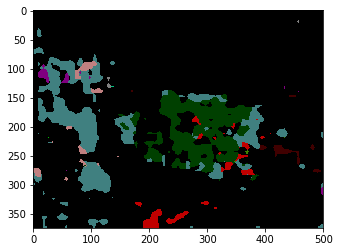

In [4]:
plt.imshow(label_matrix_to_image(output_coarse))

DEBUG:root:Label mat shape: (375, 500)
DEBUG:root:Converted shape: (375, 500, 3)


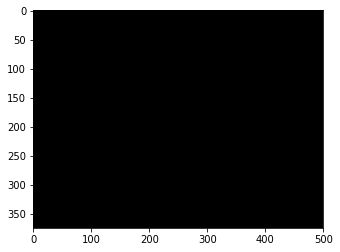

In [5]:
plt.imshow(label_matrix_to_image(output_fine))

In [9]:
print(output_fine[:3,:3])

[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [10]:
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
print_tensors_in_checkpoint_file(file_name='best_params_fine/fcn_1.ckpt', tensor_name='', all_tensors=True)

tensor_name:  Variable
[[[[  4.30470556e-01   1.18273854e-01   3.50128338e-02   3.55220795e-01
     -8.55837092e-02   2.28683010e-01   6.58324808e-02   4.23383713e-02
      1.29267856e-01   3.19103599e-02   9.51545909e-02  -9.12253261e-02
     -1.54873326e-01   5.12968265e-02  -8.42441693e-02   1.56287700e-01
      2.81196143e-02   5.19483127e-02   1.89557523e-01  -4.47222777e-02
      3.62803102e-01   2.38028809e-01   1.67671904e-01  -1.81467444e-01
      4.50481661e-02   9.69283581e-02  -4.48113047e-02  -1.87483519e-01
     -4.29950282e-02  -1.90854430e-01  -2.34869808e-01   1.29367411e-01
     -1.11599140e-01   4.71337372e-03  -2.45796561e-01  -3.04302841e-01
      6.19379841e-02  -3.29162508e-01   1.72195271e-01   1.03654049e-01
     -1.11636564e-01   3.31129849e-01  -5.76972887e-02   1.85787156e-01
      9.50858276e-03   1.07680261e-01  -1.31869227e-01  -3.63839447e-01
      6.34080842e-02   9.43597108e-02   5.01617882e-03   3.79148036e-01
      5.16881123e-02  -2.71789342e-01   1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


KeyboardInterrupt: 

In [11]:
print_tensors_in_checkpoint_file(file_name='best_params_coarse/fcn_4100.ckpt', tensor_name='', all_tensors=True)

tensor_name:  Variable
[[[[  4.29470569e-01   1.17273867e-01   3.40129584e-02   3.54220927e-01
     -8.65836963e-02   2.29682952e-01   6.68324158e-02   4.13383804e-02
      1.30267844e-01   3.29103470e-02   9.61545706e-02  -9.22253206e-02
     -1.55873314e-01   5.22967987e-02  -8.32441747e-02   1.57287687e-01
      2.91195959e-02   5.09483516e-02   1.90557480e-01  -4.37222868e-02
      3.61803114e-01   2.39028737e-01   1.66671917e-01  -1.80467457e-01
      4.40482050e-02   9.59283710e-02  -4.38113064e-02  -1.88483506e-01
     -4.39950228e-02  -1.89854458e-01  -2.33869821e-01   1.28367439e-01
     -1.10599749e-01   5.71336085e-03  -2.44796559e-01  -3.05302829e-01
      6.09379970e-02  -3.28162521e-01   1.71195298e-01   1.02654070e-01
     -1.10636652e-01   3.30129862e-01  -5.86972833e-02   1.84787169e-01
      1.05085261e-02   1.06680267e-01  -1.30869240e-01  -3.62839460e-01
      6.44080713e-02   9.33597162e-02   4.01619263e-03   3.78148049e-01
      5.26880398e-02  -2.70789355e-01   1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


KeyboardInterrupt: 